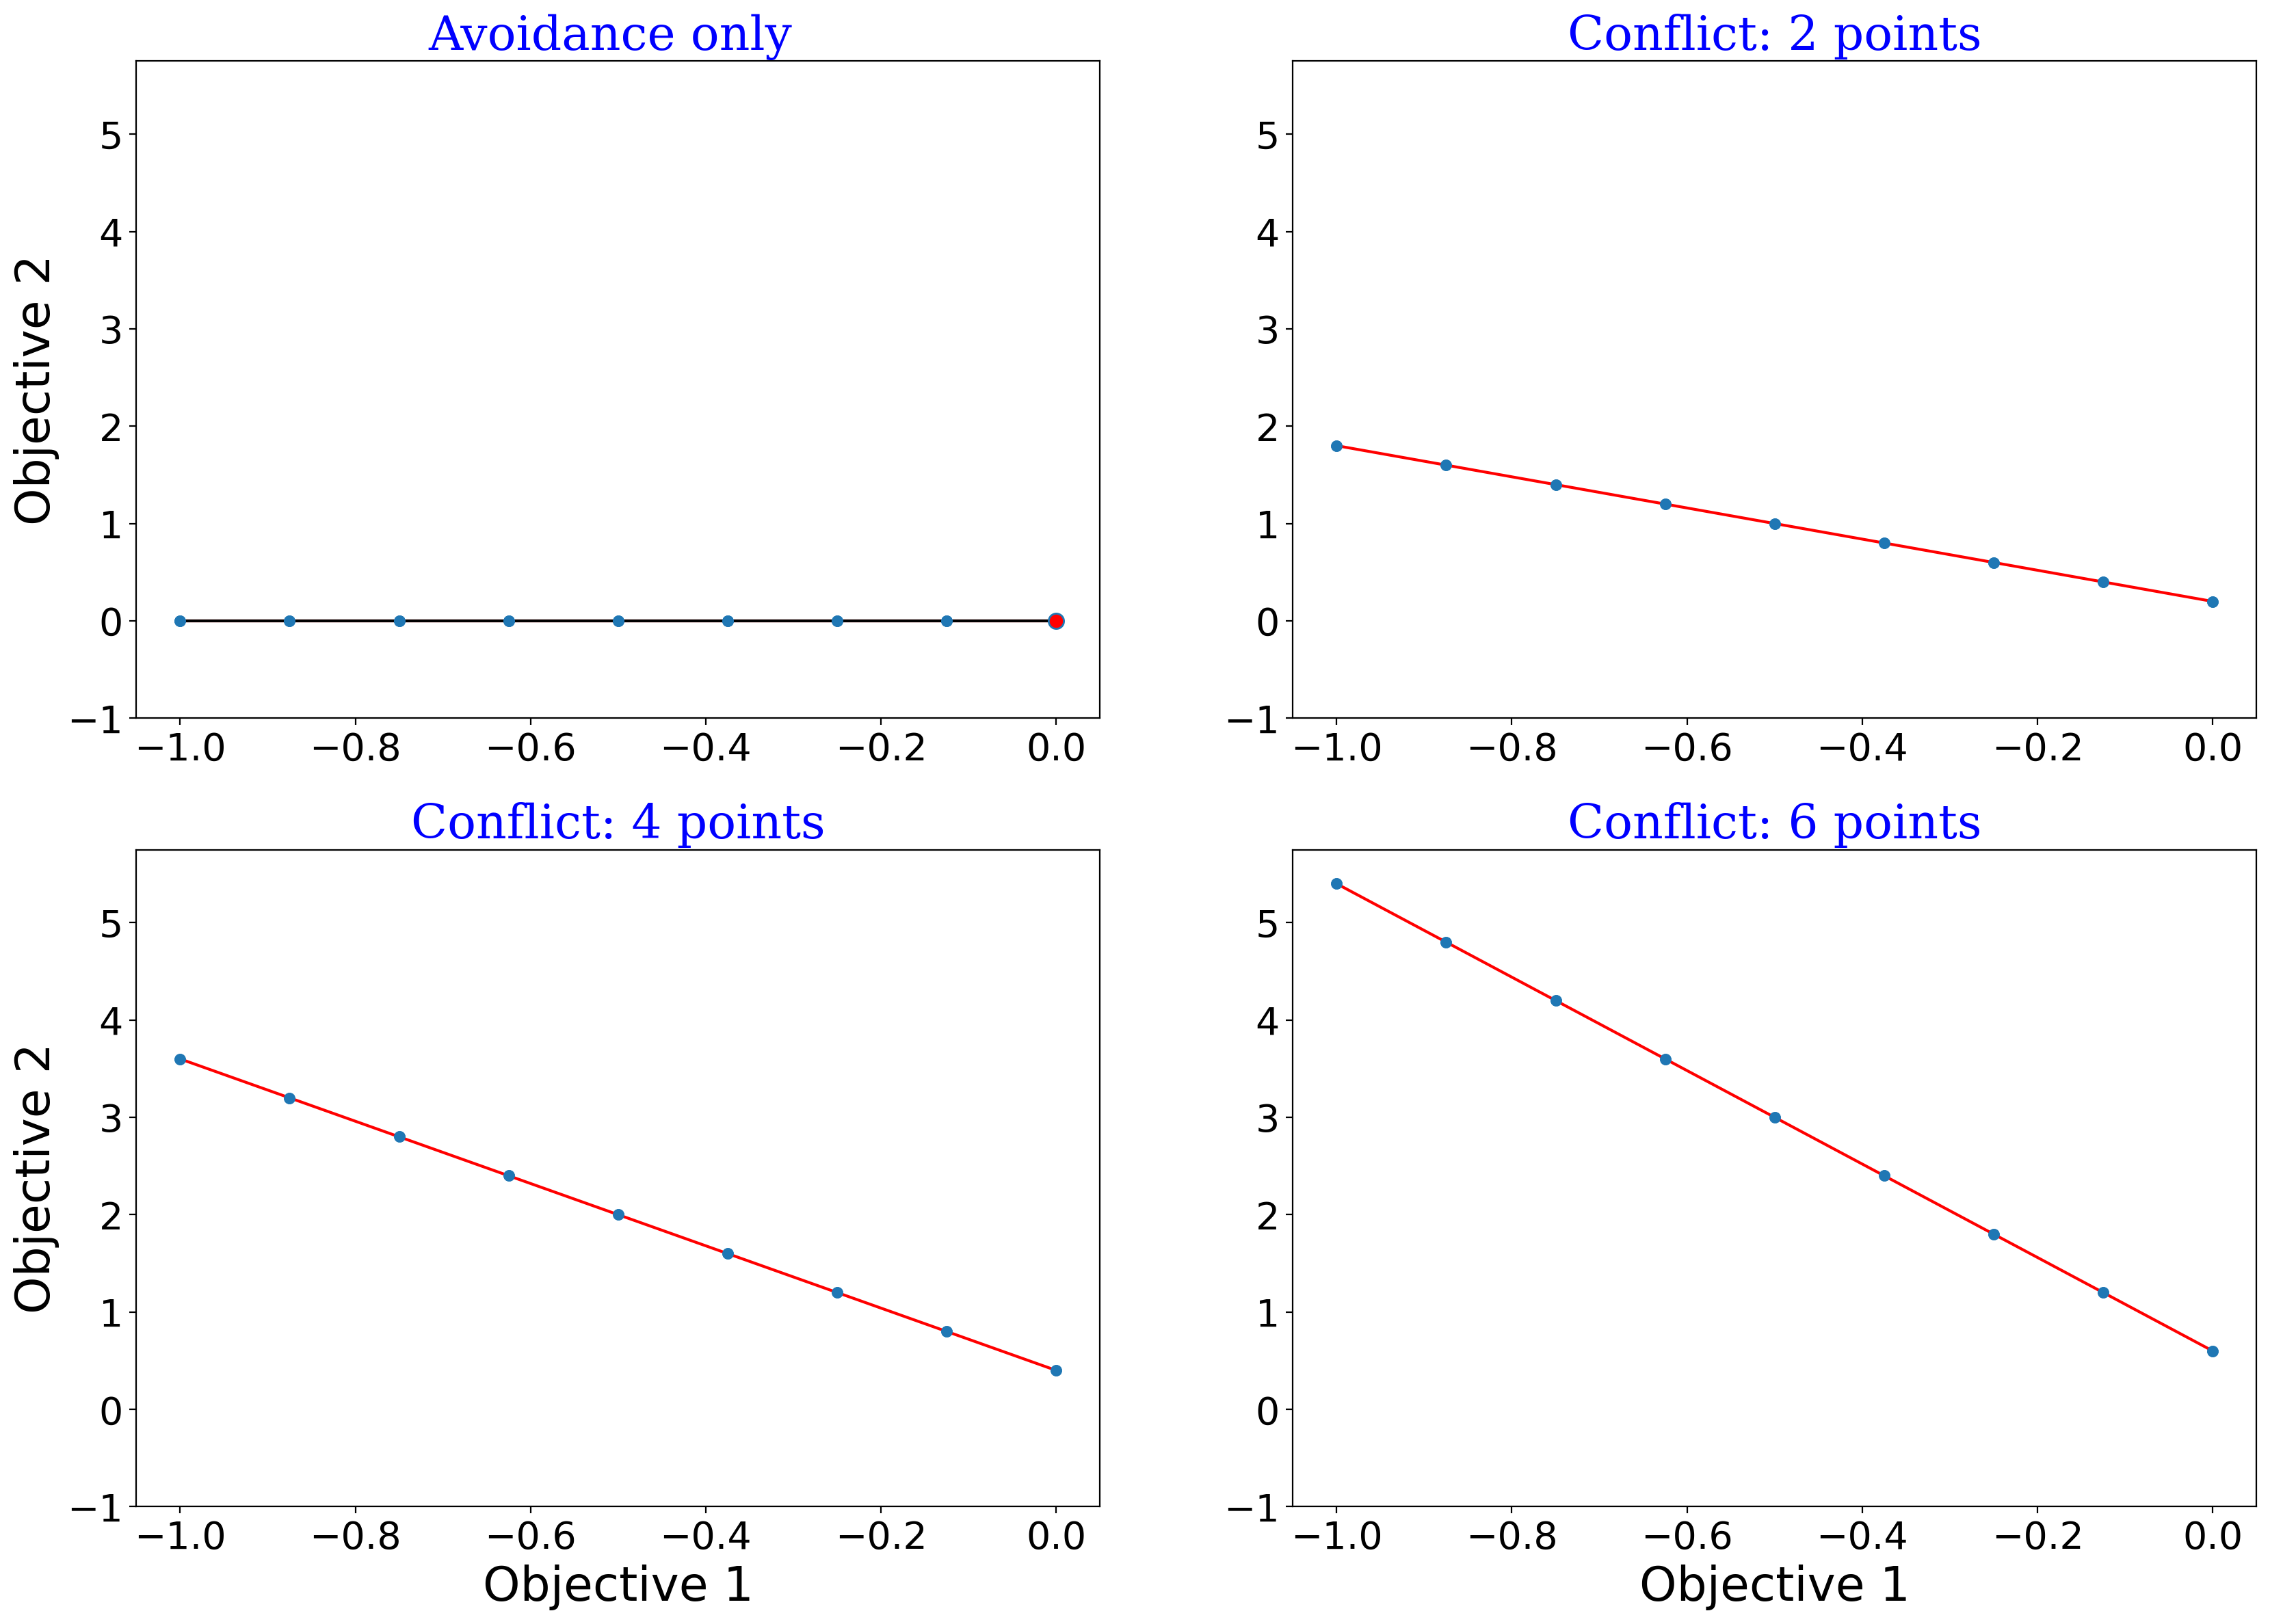

In [1]:
# plotting Pareto Front for Weather Task
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

figure(figsize=(20, 14), dpi=200)


rew_regret = np.zeros((10,4))
thr_regret = np.zeros((10,4))
lbls = ['1 ', '2', '3', '4', '5', '6', '7', '8', '9']
font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 25,
        }

for i in range(1,10):
    for s in range(4):
        rew_regret[i,s] = 2*s - 0.2*s*i
        thr_regret[i,s] = 0.2*i - 1

for c in range(4):
    col = thr_regret[:,c]
    thr_regret[:,c] = (col - np.max(col))/(np.max(col) - np.min(col))

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.ylim((-1,5.75))
    
    plt.plot(thr_regret[1:,i],rew_regret[1:,i], "-", color = 'red', marker = "o", markersize = 5,markeredgecolor = '#1f77b4', markerfacecolor = '#1f77b4')
    if i!=0:
        for j in range(1,10):
            plt.plot([thr_regret[j,i]], [rew_regret[j,i]], color = 'blue', marker = "o", markersize = 5, markeredgecolor = '#1f77b4',markerfacecolor = '#1f77b4')
    else:
        plt.yticks([-1,0,1,2,3,4,5])
        plt.plot(thr_regret[1:,i],rew_regret[1:,i], "-", color = 'black', marker = "o", markersize = 5,markeredgecolor = '#1f77b4', markerfacecolor = '#1f77b4')
        for j in range(1,10):
            plt.plot([thr_regret[j,i]], [rew_regret[j,i]], color = 'blue', marker = "o", markersize = 5,markeredgecolor = '#1f77b4', markerfacecolor = '#1f77b4')
        plt.plot([thr_regret[-1,i]],[rew_regret[-1,i]], marker = "o", markersize =  8, markerfacecolor = "red")
    if i%2==0:
        plt.ylabel("Objective 2", fontsize = 25)
    if i>=2:
        plt.xlabel("Objective 1", fontsize = 25)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    if i == 0:
        plt.title("Avoidance only ", fontdict = font)
        #plt.gca().set_yticklabels(['{:.1f}'.format(x) for x in plt.gca().get_yticks()])
    else:
        plt.title("Conflict: " + str(2*i) + " points", fontdict = font)